# Module 4 - Wrap-Up Quiz

## Importing Data

In [1]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

### Selecting Only Numerical Data

In [19]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

## Building Model

### Ridge with $\alpha=0$

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

baseline_model = make_pipeline(StandardScaler(), Ridge(alpha=0))

cv_results = cross_validate(baseline_model, data_numerical, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_estimator=True)

c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.87857e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.43133e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.17817e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.5879e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Getting Coefficients of Estimators

In [4]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge_scaled_data = pd.DataFrame(coefs, columns=numerical_features)

In [9]:
weights_ridge_scaled_data.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,393.853072,1788.597381,6865.572432,-1.099139e+18,-3.969047e+17,-1.080191e+18,1.061441e+18,-3.149716e+17,-3.798178e+17,-4.895070e+16,...,3094.223496,19599.371459,-1515.016827,5059.156309,1763.975482,-2973.315218,1233.110314,1853.069319,-1178.081773,329.086462
std,1290.681625,2081.779956,2072.690201,5.087615e+18,1.780415e+18,4.891302e+18,4.885911e+18,3.823481e+18,4.382306e+18,4.965750e+17,...,440.476203,4126.064419,3312.465044,864.717907,2006.864451,745.862102,1045.452266,1527.727431,1738.816976,1046.293027
min,-848.999122,-1022.238136,2690.082808,-9.860432e+18,-3.422472e+18,-9.319670e+18,-9.255894e+18,-1.000176e+19,-1.154376e+19,-1.321000e+18,...,2126.014179,10768.705632,-8542.877704,3936.299077,-3555.649851,-4651.099200,-580.168767,-70.312523,-2963.287112,-1207.335394
25%,-416.223724,715.115157,6086.157405,-3.350166e+18,-1.146726e+18,-3.201248e+18,6.881931e+03,-1.926069e+04,-2.080816e+04,-5.515093e+03,...,2983.200172,19684.980276,-2202.495702,4546.929073,1834.399775,-3334.074383,928.401274,1212.015735,-1989.578067,-174.032768
50%,-128.433595,1443.605642,7000.549280,-1.872578e+16,-6.670885e+15,-1.800323e+16,1.797815e+16,-4.996708e+03,-4.493055e+03,-3.459400e+03,...,3086.897109,20107.063913,-1622.875567,4681.669920,2080.509778,-2703.772474,1095.604729,1693.365816,-1687.394354,306.316599
75%,503.214264,1968.433112,7612.726475,1.393492e+04,1.504773e+03,8.032464e+03,3.219956e+18,9.363098e+17,1.056539e+18,1.165220e+17,...,3327.554605,20767.533578,-432.959411,5540.292348,2848.247607,-2509.468928,1352.724799,1960.523318,-948.699269,969.727925
max,3052.155673,6853.344926,10983.105714,9.658299e+18,3.343015e+18,9.243380e+18,9.476356e+18,4.636328e+18,5.209264e+18,5.634580e+17,...,3625.013453,25692.454227,4808.668566,6861.882286,3635.901425,-2101.289606,3669.801189,5688.532880,3369.656424,1993.562927


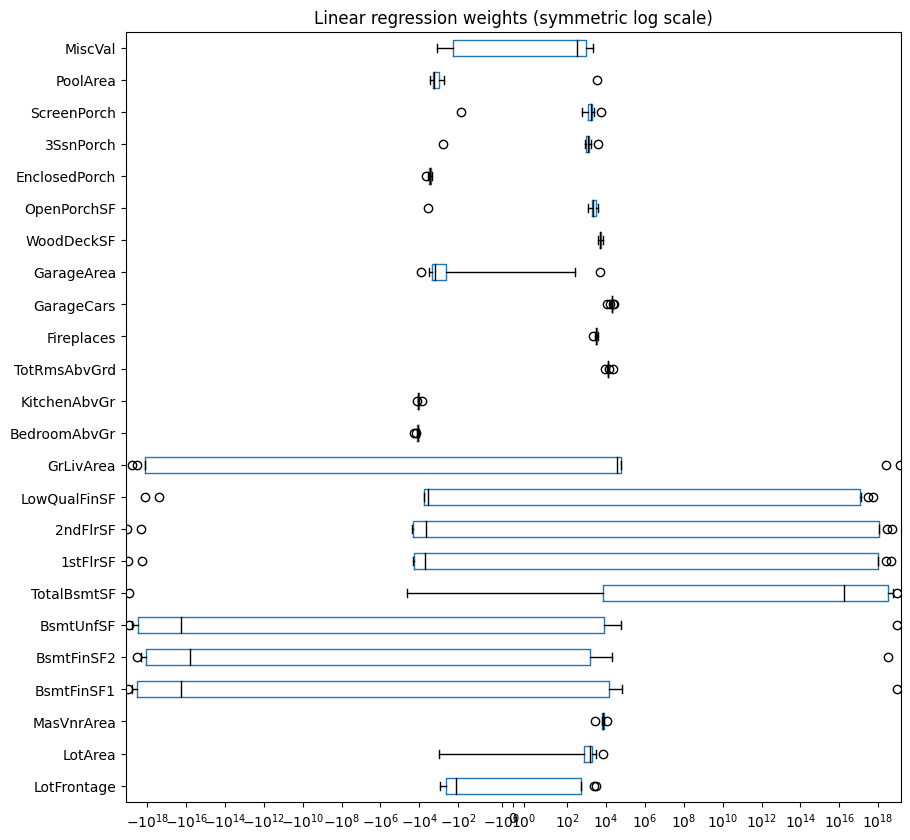

In [10]:
import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
fig, ax = plt.subplots(figsize=(10, 10))
weights_ridge_scaled_data.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(
    title="Linear regression weights (symmetric log scale)",
    xscale="symlog")

In [11]:
weights_ridge_scaled_data.abs().max(axis=0).sort_values(ascending=False)

GrLivArea        1.355205e+19
2ndFlrSF         1.154376e+19
1stFlrSF         1.000176e+19
BsmtFinSF1       9.860432e+18
TotalBsmtSF      9.476356e+18
BsmtUnfSF        9.319670e+18
BsmtFinSF2       3.422472e+18
LowQualFinSF     1.321000e+18
GarageCars       2.569245e+04
TotRmsAbvGrd     2.165622e+04
BedroomAbvGr     1.767625e+04
KitchenAbvGr     1.391002e+04
MasVnrArea       1.098311e+04
GarageArea       8.542878e+03
WoodDeckSF       6.861882e+03
LotArea          6.853345e+03
ScreenPorch      5.688533e+03
EnclosedPorch    4.651099e+03
3SsnPorch        3.669801e+03
OpenPorchSF      3.635901e+03
Fireplaces       3.625013e+03
PoolArea         3.369656e+03
LotFrontage      3.052156e+03
MiscVal          1.993563e+03
dtype: float64

### Ridge with $\alpha=1$

In [12]:
baseline_model.set_params(ridge__alpha=1)

cv_results = cross_validate(baseline_model, data_numerical, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_estimator=True)

Getting Coefficients of Estimators


In [13]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge_scaled_data = pd.DataFrame(coefs, columns=numerical_features)

In [14]:
weights_ridge_scaled_data.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,62.008411,1508.092126,6862.664154,8574.144931,-198.540154,3078.259716,11947.838543,9701.912155,12201.988699,-1718.353818,...,3087.058747,19417.910189,-725.555479,4763.085964,2095.684415,-2735.318700,943.744522,1634.099935,-1764.633609,147.261815
std,1062.472840,557.439933,552.015706,939.770178,369.927651,567.184516,1404.180462,1118.911297,711.193717,416.331230,...,551.833900,2895.287646,2155.588534,786.790243,435.069111,376.518562,499.278984,421.390982,691.910762,450.605718
min,-1014.941352,493.591270,6145.027307,7862.001820,-658.039034,2228.213769,10673.168368,7710.687901,11239.374795,-2770.569902,...,2145.052452,11610.344076,-3183.723296,3287.994032,1493.838234,-3391.962390,32.953000,740.771764,-2419.756875,-1050.602603
25%,-486.786455,1291.611311,6505.476969,8091.481496,-524.660657,2765.299956,11164.732650,8899.167392,11869.672782,-1802.614779,...,2768.417506,19619.448536,-1923.595964,4446.798523,1852.800062,-3020.762163,842.216386,1431.579263,-2139.928591,139.895799
50%,-192.133223,1388.137098,6894.089799,8316.093684,-219.236726,3110.630770,11773.845189,9756.297288,12031.776462,-1625.871471,...,3285.561365,20080.150972,-1086.087251,4691.589307,2046.583243,-2652.784025,1016.271972,1648.588568,-1845.911519,285.772197
75%,258.088836,1775.645311,6961.977406,8594.645283,131.552720,3240.205925,11951.583520,10643.856004,12658.593065,-1484.196965,...,3395.953145,20289.159535,-219.837242,5400.445928,2174.678773,-2539.116776,1064.229812,1957.752726,-1767.854494,310.992421
max,2813.950135,2601.096893,7822.622938,11098.319437,358.820285,4175.634363,15693.414764,11243.005735,13642.435186,-1280.035931,...,3758.486675,22562.769198,4626.005696,5791.918839,3030.459490,-2102.823437,1697.856940,2172.624444,71.092558,607.322413


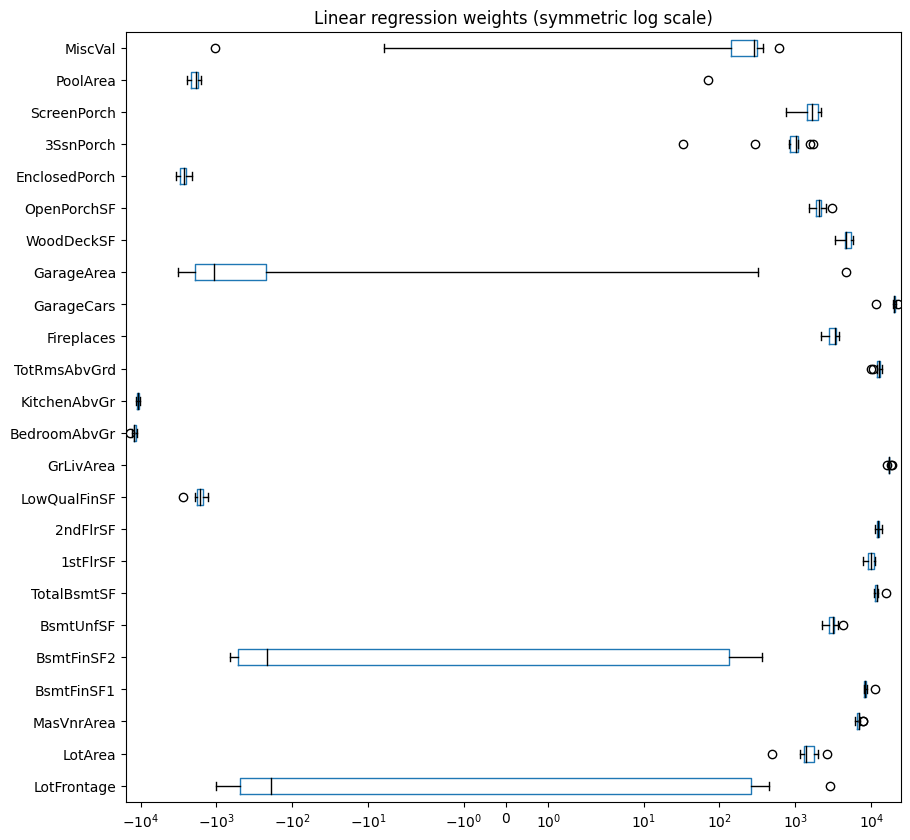

In [15]:
color = {"whiskers": "black", "medians": "black", "caps": "black"}
fig, ax = plt.subplots(figsize=(10, 10))
weights_ridge_scaled_data.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(
    title="Linear regression weights (symmetric log scale)",
    xscale="symlog")

In [16]:
weights_ridge_scaled_data.abs().max(axis=0).sort_values(ascending=False)

GarageCars       22562.769198
GrLivArea        18681.534058
TotalBsmtSF      15693.414764
TotRmsAbvGrd     13813.537407
BedroomAbvGr     13781.090924
2ndFlrSF         13642.435186
KitchenAbvGr     11580.775399
1stFlrSF         11243.005735
BsmtFinSF1       11098.319437
MasVnrArea        7822.622938
WoodDeckSF        5791.918839
GarageArea        4626.005696
BsmtUnfSF         4175.634363
Fireplaces        3758.486675
EnclosedPorch     3391.962390
OpenPorchSF       3030.459490
LotFrontage       2813.950135
LowQualFinSF      2770.569902
LotArea           2601.096893
PoolArea          2419.756875
ScreenPorch       2172.624444
3SsnPorch         1697.856940
MiscVal           1050.602603
BsmtFinSF2         658.039034
dtype: float64

## Effect of Dropping Garage Cars

### Plotting Garage Area vs. Garage Cars

<Axes: xlabel='GarageArea', ylabel='GarageCars'>

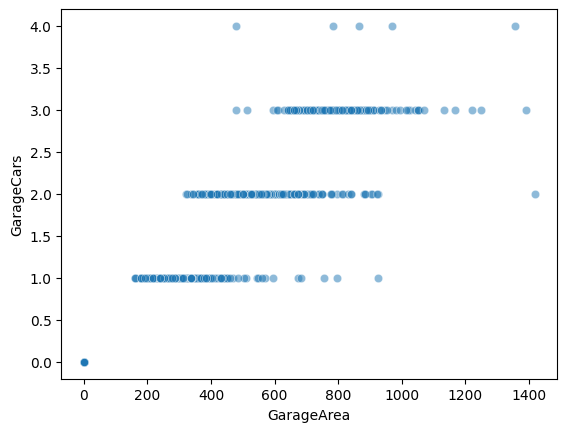

In [24]:
import seaborn as sns

sns.scatterplot(data=data_numerical, x="GarageArea", y="GarageCars", alpha=.5)

In [23]:
from scipy.stats import pearsonr
pearsonr(data_numerical["GarageArea"], data_numerical["GarageCars"])

PearsonRResult(statistic=0.8824754142814625, pvalue=0.0)

We can see from the plot and from the r-value that we have a strong positive correlation between the number of cars and the garage area.

### Dropping and Re-fitting

In [25]:
data_numerical.drop(columns="GarageArea", inplace=True)
# we can ignore the warning. It is just warning us that we are changing the original dataframe

C:\Users\user\AppData\Local\Temp\ipykernel_7176\3445716871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numerical.drop(columns="GarageArea", inplace=True)


In [26]:
# checking that the column was dropped
data_numerical

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,8,0,2,0,61,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,6,1,2,298,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,6,1,2,0,42,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,7,1,3,0,35,272,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,9,1,3,192,84,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,...,7,1,2,0,40,0,0,0,0,0
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,...,7,2,2,349,0,0,0,0,0,0
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,...,9,2,1,0,60,0,0,0,0,2500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,...,5,0,1,366,0,112,0,0,0,0


In [27]:
cv_results = cross_validate(baseline_model, data_numerical, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_estimator=True)

In [28]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge_scaled_data = pd.DataFrame(coefs, columns=data_numerical.columns)

In [30]:
weights_ridge_scaled_data.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,19.513734,1498.967540,6844.983720,8537.873135,-197.549246,3088.973049,11920.702433,9652.195672,12193.817284,-1721.808665,...,12176.413406,3134.199017,18837.624639,4758.777609,2072.478059,-2746.834573,947.049886,1629.835272,-1779.135267,137.505390
std,1159.029135,568.011018,540.176313,992.485148,368.231335,548.208731,1450.617996,1018.697130,710.796801,415.392624,...,1127.180606,624.956262,1305.139394,782.887560,433.104794,363.718516,505.119785,423.654932,694.608935,458.443779
min,-1141.650319,472.569716,6126.242261,7866.414821,-657.838705,2270.441408,10654.884244,7995.512456,11235.731784,-2778.365718,...,10037.220929,1948.754914,15404.159197,3299.396352,1491.390358,-3403.482187,23.532153,742.399779,-2421.570766,-1074.078351
25%,-574.068158,1273.590450,6567.904185,8062.675355,-524.499192,2788.865224,11091.453861,8836.357494,11851.234032,-1807.469492,...,12061.889038,2787.577664,18650.548120,4439.861361,1823.420233,-2968.269244,845.452444,1410.448649,-2157.724094,136.622410
50%,-277.121697,1384.790597,6871.154191,8286.212842,-233.001929,3123.828082,11752.441470,9673.302156,12027.759250,-1625.676713,...,12403.707085,3406.934977,19223.437732,4675.750801,2016.067247,-2664.061692,1018.866222,1652.630939,-1854.037539,254.032526
75%,124.099586,1773.421055,6942.308480,8475.852932,133.714173,3251.421441,11888.938100,10489.350308,12639.401273,-1492.837636,...,12808.745466,3575.306019,19480.972031,5395.521582,2188.653232,-2582.818841,1071.290366,1955.897041,-1781.377370,301.612793
max,3050.032793,2616.701180,7784.927777,11242.508045,364.283906,4125.676888,15799.183845,11123.582373,13640.660824,-1282.807241,...,13816.022945,3803.488159,19963.351138,5785.339784,2978.159897,-2135.467975,1718.236988,2172.345807,57.255505,654.503711


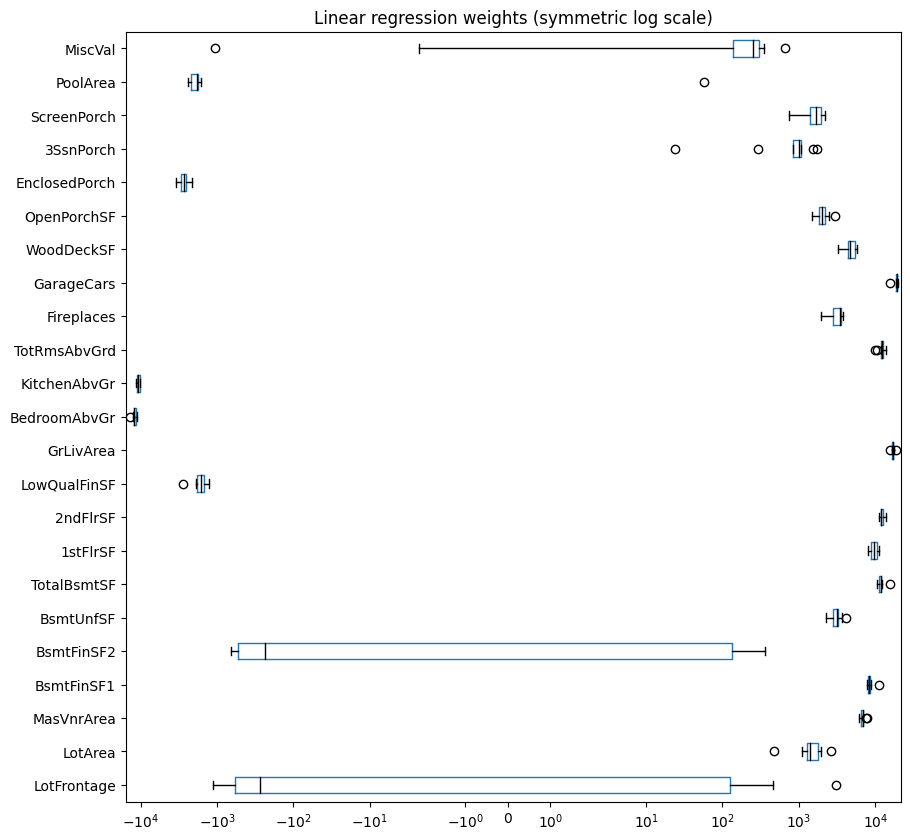

In [29]:
color = {"whiskers": "black", "medians": "black", "caps": "black"}
fig, ax = plt.subplots(figsize=(10, 10))
weights_ridge_scaled_data.plot.box(color=color, vert=False, ax=ax)
_ = ax.set(
    title="Linear regression weights (symmetric log scale)",
    xscale="symlog")

In [26]:
weights_ridge_scaled_data.abs().max(axis=0).sort_values(ascending=False)

GarageCars       19963.351138
GrLivArea        18578.859334
TotalBsmtSF      15799.183845
BedroomAbvGr     13916.407897
TotRmsAbvGrd     13816.022945
2ndFlrSF         13640.660824
KitchenAbvGr     11524.982207
BsmtFinSF1       11242.508045
1stFlrSF         11123.582373
MasVnrArea        7784.927777
WoodDeckSF        5785.339784
BsmtUnfSF         4125.676888
Fireplaces        3803.488159
EnclosedPorch     3403.482187
LotFrontage       3050.032793
OpenPorchSF       2978.159897
LowQualFinSF      2778.365718
LotArea           2616.701180
PoolArea          2421.570766
ScreenPorch       2172.345807
3SsnPorch         1718.236988
MiscVal           1074.078351
BsmtFinSF2         657.838705
dtype: float64

## Ridge CV

In [31]:
from sklearn.linear_model import RidgeCV
import numpy as np

alphas=np.logspace(-3, 3, num=101)

ridge = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=alphas, store_cv_values=True)
)

In [78]:
cv_results = cross_validate(
    ridge,
    data_numerical,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
    n_jobs=2,
)

Checking the effect of tuning alpha on the variability of the weights of the feature "GarageCars"

In [63]:
RidgeCV_coefficients = []

for estimator in cv_results["estimator"]:
    RidgeCV_coefficients.append(estimator[-1].coef_)

RidgeCV_coefficients = pd.DataFrame(RidgeCV_coefficients, columns=data_numerical.columns)

RidgeCV_coefficients.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1076.372710,1673.746063,7626.940793,7855.947563,-356.110607,3039.979062,11099.122753,8997.405037,9899.982639,-1465.080100,...,9362.902696,4798.450684,16702.811737,5148.048061,3250.924735,-2531.623030,976.229020,1560.456578,-1202.762672,4.813636
std,981.002414,521.458866,515.437992,1157.845053,287.667397,296.650955,1429.382065,391.067456,1409.514768,510.497826,...,523.656162,753.828233,852.001476,610.035126,432.517952,331.057875,253.575488,437.540513,1658.880153,371.939601
min,140.346777,123.563401,6448.967092,6995.863173,-1120.722548,2506.880017,9976.845133,8206.478899,8341.093996,-2562.877404,...,8234.988261,2396.792178,14144.964789,3351.948639,1998.884334,-3504.563347,358.666429,530.739557,-5176.101720,-1252.658034
25%,564.437365,1577.480587,7324.878982,7368.531503,-574.765244,2894.471156,10450.920715,8728.087801,9342.065046,-1516.565017,...,8966.020427,4769.026313,16660.536699,4975.356197,3011.171755,-2608.268162,892.740158,1214.167745,-1525.879420,-31.733779
50%,796.098420,1804.397748,7574.197797,7474.315287,-310.762799,2999.723440,10684.385258,8990.121446,9550.560459,-1325.975299,...,9340.283593,4981.220533,16962.249899,5283.259678,3263.858935,-2496.775699,1037.526248,1687.269483,-1193.141110,39.557357
75%,993.203380,1964.426285,8031.016977,7730.578828,-149.337843,3139.890109,10890.396668,9161.275737,9762.834305,-1124.264395,...,9707.520227,5149.814069,17152.984454,5520.806829,3505.724770,-2323.881728,1120.537883,1860.448396,-1144.224398,113.659380
max,4185.863966,2345.692266,8643.971906,11472.132161,142.192300,4058.962161,15784.356435,10119.386264,14441.634800,-648.048417,...,10432.967470,5654.447291,17893.313044,5911.642315,4363.417013,-1815.518628,1486.411375,2208.149402,3456.594697,626.481037


Checking the best alpha for each fold,

In [53]:
best_alpha_per_fold = []
for estimator in cv_results["estimator"]:
    best_alpha_per_fold.append(estimator[-1].alpha_)

print(
    "Mean alpha of tuned ridge model:\n"
    f"{np.array(best_alpha_per_fold).mean():.2f} ± {np.array(best_alpha_per_fold).std():.2f}"
)

Mean alpha of tuned ridge model:
299.64 ± 80.51


## Model with Numerical and Categorical Features

In [73]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

# We are not looking for the remaining columns, just those having an object dtype.
# categorical_features = data.columns.difference(numerical_features)
categorical_columns_selector = selector(dtype_include=object)
categorical_features = categorical_columns_selector(data)

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer(
    [("categorical", categorical_preprocessor, categorical_features),
     ("numerical", numerical_preprocessor, numerical_features)])

full_model = make_pipeline(preprocessor, RidgeCV(alphas=alphas, store_cv_values=True))
full_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQu...
       3.63078055e+01, 4.16869383e+01, 4.78630092e+01, 5.49540874e+01,
       6.30957344e+01, 7.24435960e+01, 8.31763771e+01, 9.54992586e+01,
       1.09647820e+02, 1.25892541e+02, 1.44543977e+02, 1.65958691e+02,
       1.90546072e+02, 2.18776162e+02, 2.51188643e+02, 2.88403150e+02,
       3.31131121e+02, 3.80189396e+02, 4.36515832e+02, 5.01187234e+02,
       5.75439937e+02, 6.60693448e+02, 7.58577575e+02, 8.70963590e+02,
       1.00000000e+03]),
                         store_cv_values=True))])

In [79]:
cv_fm_results = cross_validate(
    full_model,
    data,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
    n_jobs=2,
)

The scoring is `neg_mean_squared_error`. If a model performs better, it should have a smaller **'MSE'** but a bigger **Negative 'MSE'**.

Carrying a fold-to-fold between to models yields,

In [85]:
cv_results["test_score"] > cv_fm_results["test_score"]

array([False, False, False, False, False, False, False, False, False,
       False])

## More Complex Model

In [86]:
from sklearn.preprocessing import SplineTransformer
from sklearn.kernel_approximation import Nystroem

numerical_preprocessor = SplineTransformer()

preprocessor = ColumnTransformer(
    [("categorical", categorical_preprocessor, categorical_features),
     ("numerical", numerical_preprocessor, numerical_features)])

fuller_model = make_pipeline(preprocessor, Nystroem(kernel="poly", degree=2, n_components=300),
                             RidgeCV(alphas=alphas, store_cv_values=True))
fuller_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQu...
       3.63078055e+01, 4.16869383e+01, 4.78630092e+01, 5.49540874e+01,
       6.30957344e+01, 7.24435960e+01, 8.31763771e+01, 9.54992586e+01,
       1.09647820e+02, 1.25892541e+02, 1.44543977e+02, 1.65958691e+02,
       1.90546072e+02, 2.18776162e+02, 2.51188643e+02, 2.88403150e+02,
       3.31131121e+02, 3.80189396e+02, 4.36515832e+02, 5.01187234e+02,
       5.75439937e+02, 6.60693448e+02, 7.58577575e+02, 8.70963590e+02,
       1.00000000e+03]),
                         store_cv_values=True))])

In [87]:
cv_ferm_results = cross_validate(
    fuller_model,
    data,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
    n_jobs=2,
)

Fold-to-fold comparison,

In [88]:
cv_ferm_results["test_score"] > cv_fm_results["test_score"]

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])